In [31]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [32]:
def plot_boxplot(df_path):
    df_boxplot = pd.read_csv(df_path,
                            index_col=0
                            )
    fig, axes = plt.subplots(1, 3, figsize=(35, 8), sharey=True)

    sns.boxplot(ax=axes[0], data=df_boxplot, orient="v", palette="Set2", showfliers=False, x='Method', y='Spearman CC')
    axes[0].set_title("Spearman CC")

    sns.boxplot(ax=axes[1], data=df_boxplot, orient="v", palette="Set2", showfliers=False, x='Method', y='Pearson CC')
    axes[1].set_title("Pearson CC")

    sns.boxplot(ax=axes[2], data=df_boxplot, orient="v", palette="Set2", showfliers=False, x='Method', y='Kendall Tau')
    axes[2].set_title("Kendall Tau")

    plt.suptitle("Correlations", fontsize=16)

In [33]:
def table_correlation(df):
    data_dict = {}
    methods = np.unique(df['Method'].values)
    for method in methods:
        data_dict[method] = list(df[df.Method==method].mean())
    results_corr = pd.DataFrame.from_dict(data_dict, orient='index', columns=['Spearman CC', 'Pearson CC', 'Kendal Tau CC'])
    return results_corr

# 1. Gaussian Experiments (100 leaves, 10 trees, $\sigma^2=2$)

## 1.a.  Comparison of the posterior predictive densities of internal nodes

Low fitness

### 1.a.i MSE / MAE (L2/L1 error) for the mean estimate on feature space

In [47]:
df_mse = pd.read_csv("/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/lambda2.0/100/low_fitness/MSE")

print('Mean Squared Error')
df_mse.describe().iloc[1:3].drop(['Unnamed: 0'], axis=1)

Mean Squared Error


,average,gaussian VAE,gaussian treeVAE
mean,0.767643,0.862912,0.540534
std,0.032233,0.107996,0.068426


In [45]:
df_l1 = pd.read_csv("/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/lambda2.0/100/low_fitness/L1")

print('L1 error')
df_l1.describe().iloc[1:3].drop(['Unnamed: 0'], axis=1)

L1 error


,average,gaussian VAE,gaussian treeVAE
mean,0.682381,0.725407,0.574829
std,0.016152,0.042684,0.033481


### 1.a.ii. Correlations (Pearson / Spearman / Kendall) across genes or across internal nodes for all methods

***Low fitness***

In [46]:
# data frame
df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/lambda2.0/100/low_fitness/correlations_gg')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Sample-Sample correlations')
print(df_corr)
print('\n')

df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/lambda2.0/100/low_fitness/correlations_ss')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Gene-Gene correlations')
print(df_corr)

Sample-Sample correlations
                  Spearman CC  Pearson CC  Kendal Tau CC
average              0.935338    0.943047       0.799288
gaussian VAE         0.931199    0.939172       0.795442
gaussian treeVAE     0.950093    0.956738       0.824655


Gene-Gene correlations
                  Spearman CC  Pearson CC  Kendal Tau CC
average              0.802985    0.828405       0.629538
gaussian VAE         0.820835    0.846101       0.648108
gaussian treeVAE     0.844116    0.869268       0.679801


### 1.a.iii MSE/MAE (L2/L1 error) for the variance estimate on the *latent space*

In [48]:
df_var = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/lambda2.0/100/low_fitness/MSE_var')

print("MSE of variance estimate in latent space")
df_var.columns = ['Unnamed: 0','gaussian treeVAE', 'gaussian VAE']
df_var.drop(['Unnamed: 0'], axis=1).describe().iloc[1:3]

MSE of variance estimate in latent space


,gaussian treeVAE,gaussian VAE
mean,0.000374,0.000296
std,0.000049,0.000053


### 1.a.iv MSE/MAE (L2/L1 error) for the mean estimate on the *latent space*

***Low fitness***

In [49]:
df_var = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/lambda2.0/100/low_fitness/MSE_mean')

print("MSE of variance estimate in latent space")
df_var.columns = ['Unnamed: 0', 'gaussian treeVAE', 'gaussian VAE']
df_var.drop(['Unnamed: 0'], axis=1).describe().iloc[1:3]

MSE of variance estimate in latent space


,gaussian treeVAE,gaussian VAE
mean,1.890859,2.284896
std,0.704215,0.719905


### 1.a.v. Log-Likelihood of samples from the approximate predictive according to the ground truth posterior predictive

***Low fitness***

In [52]:
df_lik = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/lambda2.0/100/low_fitness/Cross_Entropy')
df_lik.drop(['Unnamed: 0'], axis=1).describe().iloc[1:2]

,gaussian VAE,gaussian treeVAE
mean,-2515.5431,-281.015742


In [51]:
df_purity = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/lambda2.0/100/low_fitness/purity_full')
df_purity[df_purity.K == 5].drop(['Unnamed: 0'], axis=1).mean(), 

(K         5.000000
 scVI      0.372408
 cascVI    0.450439
 dtype: float64,)

# 2. Poisson Experiments (500 leaves, 10 trees, binomial thinning=0.1)

## 2.a. Comparison of the prior predictive against the posterior predictive densities of internal nodes

### 2.a.i Correlations (Pearson / Spearman / Kendall) across genes or across internal nodes for all methods

***high fitness***

In [63]:
# data frame
df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/lambda1.0/500/no_fitness/bin0.1/correlations_gg')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Sample-Sample correlations')
print(df_corr)
print('\n')

df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/lambda1.0/500/no_fitness/bin0.1/correlations_ss')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Gene-Gene correlations')
print(df_corr)

Sample-Sample correlations
         Spearman CC  Pearson CC  Kendal Tau CC
Average     0.629089    0.893671       0.597842
cascVI      0.610129    0.906371       0.508497
scVI        0.601933    0.894174       0.507305


Gene-Gene correlations
         Spearman CC  Pearson CC  Kendal Tau CC
Average     0.314034    0.350478       0.272883
cascVI      0.326861    0.412718       0.255817
scVI        0.324289    0.402297       0.254979


## 2.4 Effect of binomial thinning on performance

In [5]:
def plot_binomial_thin(folder_path, proportions):
    metrics = ["Spearman CC", "Pearson CC", "Kendall Tau"]
    methods = ['Average', 'Oracle MP', 'cascVI', 'scVI']
    fig, axes = plt.subplots(1, 3, figsize=(35, 8), sharey=True)
    for i, metric in enumerate(metrics):
        for method in methods:
            values = []
            for p in proportions:
                file_path = os.path.join(folder_path, 'bin'+str(p))
                file_path = os.path.join(file_path, 'correlations_gg')
                df = pd.read_csv(file_path)
                values.append(df[df["Method"]==method][metric].mean())

            axes[i].plot(proportions, values, label=method,
                     linestyle='dashed', linewidth=2, markersize=12,
                     marker='o'
                     )
        axes[i].grid()
        axes[i].legend()
        axes[i].set_title(metric)
        axes[i].set_xlabel("proportion of binomial thinning"), axes[i].set_ylabel(metric)
    plt.suptitle("Binomial Thinning", fontsize=24)
    plt.show()

***High fitness***

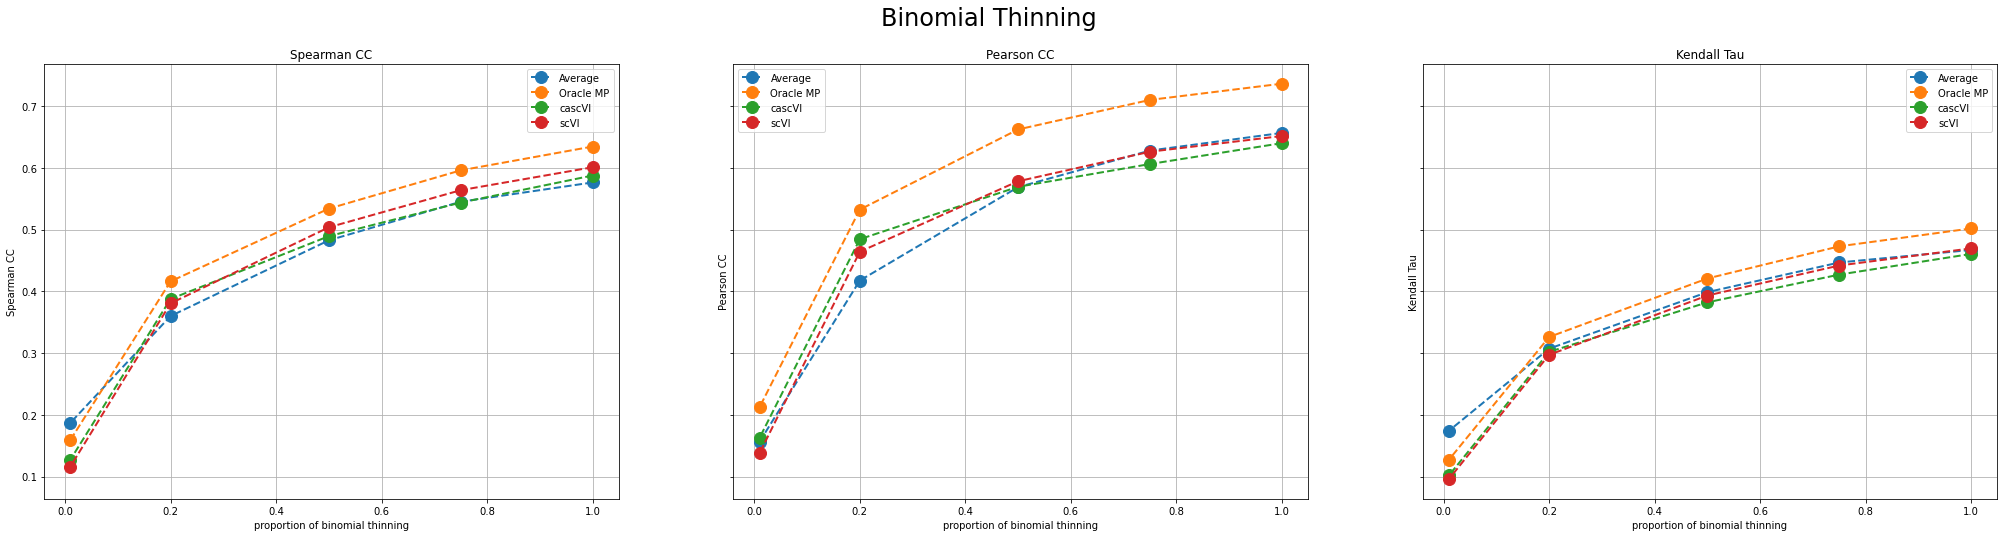

In [13]:
folder_path = "/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/500/no_fitness"
proportions = [1.0, 0.75, 0.5, 0.2, 0.01]

plot_binomial_thin(folder_path, proportions)

***MSE in feature space***

In [54]:
df_mse = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/lambda1.0/500/no_fitness/bin0.1/MSE')
df_mse.describe().iloc[1:3].drop(['Unnamed: 0'], axis=1)

,cascVI,scVI,Average
mean,5.800208e+06,5.813720e+06,7.527232e+06
std,1.603860e+06,1.388925e+06,1.368533e+06


***L1 error in feature space***

In [55]:
df_l1 = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/lambda1.0/500/no_fitness/bin0.1/L1')
df_l1.describe().iloc[1:3].drop(['Unnamed: 0'], axis=1)

,cascVI,scVI,Average
mean,655.419854,649.377921,624.085960
std,111.735559,113.829016,117.102632


# 2.5 Latent space metrics    

## 2.5.1 k-NN purity

In [56]:
df_purity = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/lambda1.0/500/no_fitness/bin0.1/purity_full')
df_purity[df_purity.K == 5].drop(['Unnamed: 0'], axis=1).mean(), 

(K         5.000000
 scVI      0.523395
 cascVI    0.615616
 dtype: float64,)

In [57]:
df_purity[df_purity.K == 10].drop(['Unnamed: 0'], axis=1).mean()

K         10.000000
scVI       0.500054
cascVI     0.561410
dtype: float64

## Cross Entropy

In [58]:
df_ce = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/lambda1.0/500/no_fitness/bin0.1/Cross_Entropy')
df_ce

,Unnamed: 0,gaussian VAE,gaussian treeVAE
0,0,-7901.163300,-1398.552548
1,1,-9840.866212,-1089.912375
2,2,-7002.479885,-2415.419145
3,3,-7400.156754,-1419.299124
4,4,-11141.831231,-955.738802
5,5,-7311.095276,-1612.071799
6,6,-6872.294702,-1613.019690
7,7,-11914.450429,-1075.114383
8,8,-6750.965770,-1207.799671
9,9,-8680.268118,-2985.693145


In [59]:
df_ce['gaussian treeVAE'].mean(), df_ce['gaussian VAE'].mean()

(-1577.2620680265338, -8481.557167728484)

# 3. Metastasis analysis

***ELBO***

In [61]:
df_elbo = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/metastasis/Metastasis_lg7_100g.npy/t_norm_14/ELBO')

print('ELBO')
df_elbo.drop(['Unnamed: 0'], axis=1).describe()[1:3]

ELBO


,VAE,treeVAE,VAE full batch
mean,388.641373,265.539313,265.886705
std,121.391120,2.195903,2.329209


***Cross Entropy***

In [62]:
df_ce = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/metastasis/Metastasis_lg7_100g.npy/t_norm_12.0/Cross_Entropy')

print('Cross-Entropy')
df_ce.drop(['Unnamed: 0'], axis=1).describe()[1:3]

Cross-Entropy


,VAE,treeVAE,VAE full batch
mean,-14794.772435,-4755.962511,-13966.041514
std,735.127747,172.710488,433.722478


***Purity***

In [10]:
df_purity = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/metastasis/Metastasis_lg7_100g.npy/t_norm_16.0/purity_full')
print('Purity')
df_purity[df_purity.K == 15].drop(['Unnamed: 0'], axis=1).describe()[1:3]

Purity


,K,scVI,cascVI
mean,15.0,0.125062,0.116934
std,0.0,0.001892,0.001584


In [ ]:
’